In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# 데이터 가져오기

In [2]:
merge_df=pd.read_csv('./old+new감성어.csv',index_col='Date')

In [3]:
merge_df

Unnamed: 0    Close     Open     High      Low        Volume  \
Date                                                                       
2017-01-06           0  2049.12  2048.11  2051.84  2045.66  4.553500e+08   
2017-01-09           1  2048.78  2053.18  2053.18  2046.47  3.982900e+08   
2017-01-10           2  2045.12  2043.30  2046.78  2039.50  5.126600e+08   
2017-01-11           3  2075.17  2048.08  2079.70  2047.56  3.355300e+08   
2017-01-12           4  2087.14  2077.69  2087.14  2073.89  5.558400e+08   
...                ...      ...      ...      ...      ...           ...   
2020-12-23         972  2759.82  2737.74  2769.08  2716.28  1.120000e+09   
2020-12-24         973  2806.86  2762.60  2812.16  2762.60  1.030000e+09   
2020-12-28         974  2808.60  2820.95  2834.59  2799.56  1.010000e+09   
2020-12-29         975  2820.51  2810.55  2823.44  2792.06  1.050000e+09   
2020-12-30         976  2873.47  2820.36  2878.21  2809.35  1.070000e+09   

            Change        점수      긍정개수      부정개수  ...   new중립개수   new긍정비율  \
Date                                              ...                       
2017-01-06  0.0035  0.419847  0.068182  0.096774  ...  0.261968  0.618678   
2017-01-09 -0.0002  0.473282  0.090909  0.064516  ...  0.368351  0.538132   
2017-01-10 -0.0018  0.320611  0.045455  0.322581  ...  0.261303  0.565195   
2017-01-11  0.0147  0.442748  0.022727  0.000000  ...  0.253324  0.661121   
2017-01-12  0.0058  0.396947  0.022727  0.129032  ...  0.282580  0.585610   
...            ...       ...       ...       ...  ...       ...       ...   
2020-12-23  0.0096  0.458015  0.090909  0.064516  ...  0.264628  0.635444   
2020-12-24  0.0170  0.458015  0.090909  0.032258  ...  0.189495  0.756275   
2020-12-28  0.0006  0.488550  0.113636  0.064516  ...  0.296543  0.663548   
2020-12-29  0.0042  0.419847  0.045455  0.064516  ...  0.213431  0.697984   
2020-12-30  0.0188  0.480916  0.090909  0.000000  ...  0.261968  0.591647   

             new부정비율   new중립비율  new종가-시가  new종가-시가증감  new비율점수  new감성어_Change  \
Date                                                                           
2017-01-06  0.143331  0.328544  0.665253           1      1.0       0.540019   
2017-01-09  0.209910  0.351556  0.644015           0      1.0       0.538817   
2017-01-10  0.335201  0.217324  0.668433           1      1.0       0.531228   
2017-01-11  0.159542  0.272475  0.767636           1      1.0       0.546626   
2017-01-12  0.204081  0.309364  0.698387           1      1.0       0.535001   
...              ...       ...       ...         ...      ...            ...   
2020-12-23  0.121786  0.330339  0.747968           1      1.0       0.552050   
2020-12-24  0.077791  0.247944  0.835041           1      1.0       0.540726   
2020-12-28  0.142933  0.284291  0.612806           0      1.0       0.541265   
2020-12-29  0.085821  0.298995  0.700389           1      1.0       0.535012   
2020-12-30  0.124046  0.371930  0.869784           1      1.0       0.535559   

            new감성어5일_Change  new감성어5일이동평균  
Date                                       
2017-01-06         0.166702         292.6  
2017-01-09         0.165351         310.0  
2017-01-10         0.164463         292.2  
2017-01-11         0.166410         262.4  
2017-01-12         0.165834         273.2  
...                     ...           ...  
2020-12-23         0.167093         213.8  
2020-12-24         0.166678         243.4  
2020-12-28         0.166602         262.8  
2020-12-29         0.167693         281.8  
2020-12-30         0.165610         328.6  

[977 rows x 33 columns]

# train data, test_data 분리작업

In [4]:
# old감성어는 비율점수 없애고, new 감성어는 비율점수 넣는게 잘나옴.
x=merge_df[['점수','긍정개수','부정개수','긍정비율','부정비율','종가-시가','감성어_Change',
            '감성어5일_Change','감성어5일이동평균','new점수','new긍정개수','new부정개수',
            'new긍정비율','new부정비율','new종가-시가','new감성어_Change','new감성어5일_Change','new비율점수','new감성어5일이동평균']]

y=merge_df['new종가-시가증감']

In [5]:
#train 데이터와 test 데이터 분리과정 

train_test_split=600
기간=1

x_train = x.iloc[:train_test_split-기간, :]
y_train = y.iloc[기간:train_test_split]

x_test = x.iloc[train_test_split-기간:-기간, :]
y_test = y.iloc[train_test_split:]

# 머신러닝 실행 및 결과

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print(classification_report(y_test, pred))
    print('정확도 :', round(accuracy, 2), '정밀도 :', round(precision, 2), '재현율 :', round(recall, 2), 
         'F1 :', round(f1,2), 'AUC :', round(roc_auc, 2))

In [7]:
# 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_pred_proba = tree.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, tree_pred, tree_pred_proba)

오차행렬
[[96 87]
 [97 97]]
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       183
           1       0.53      0.50      0.51       194

    accuracy                           0.51       377
   macro avg       0.51      0.51      0.51       377
weighted avg       0.51      0.51      0.51       377

정확도 : 0.51 정밀도 : 0.53 재현율 : 0.5 F1 : 0.51 AUC : 0.51


In [8]:
# 2
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_proba = rfc.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, rfc_pred, rfc_pred_proba)

오차행렬
[[122  61]
 [127  67]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.56       183
           1       0.52      0.35      0.42       194

    accuracy                           0.50       377
   macro avg       0.51      0.51      0.49       377
weighted avg       0.51      0.50      0.49       377

정확도 : 0.5 정밀도 : 0.52 재현율 : 0.35 F1 : 0.42 AUC : 0.51


In [9]:
# 3
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_proba = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[180   3]
 [185   9]]
              precision    recall  f1-score   support

           0       0.49      0.98      0.66       183
           1       0.75      0.05      0.09       194

    accuracy                           0.50       377
   macro avg       0.62      0.51      0.37       377
weighted avg       0.63      0.50      0.36       377

정확도 : 0.5 정밀도 : 0.75 재현율 : 0.05 F1 : 0.09 AUC : 0.53


In [10]:
# 4
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train, y_train)
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

오차행렬
[[105  78]
 [103  91]]
              precision    recall  f1-score   support

           0       0.50      0.57      0.54       183
           1       0.54      0.47      0.50       194

    accuracy                           0.52       377
   macro avg       0.52      0.52      0.52       377
weighted avg       0.52      0.52      0.52       377

정확도 : 0.52 정밀도 : 0.54 재현율 : 0.47 F1 : 0.5 AUC : 0.52


In [11]:
# 5
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)
XGB_pred_proba = XGB.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, XGB_pred, XGB_pred_proba)

[00:43:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[ 98  85]
 [104  90]]
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       183
           1       0.51      0.46      0.49       194

    accuracy                           0.50       377
   macro avg       0.50      0.50      0.50       377
weighted avg       0.50      0.50      0.50       377

정확도 : 0.5 정밀도 : 0.51 재현율 : 0.46 F1 : 0.49 AUC : 0.5


/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# gridsearch 실행 및 결과

In [12]:
# gridsearchCV
from sklearn.model_selection import GridSearchCV

In [13]:
# 1
xgb_clf = XGBClassifier(n_estimators=100)

param = {'max_depth':[5,7], 'colsample_bytree':[0.5, 0.75]}

gridcv=GridSearchCV(xgb_clf, param_grid = param, cv=3)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', \
          eval_set=[(x_train, y_train), (x_test, y_test)])

grid_xgb_pred=gridcv.predict(x_test)
grid_xgb_pred_proba=gridcv.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_xgb_pred, grid_xgb_pred_proba))

print(gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')

[0]	validation_0-auc:0.68163	validation_1-auc:0.50063
[1]	validation_0-auc:0.74490	validation_1-auc:0.47441
[2]	validation_0-auc:0.80958	validation_1-auc:0.49568
[3]	validation_0-auc:0.83003	validation_1-auc:0.50724
[4]	validation_0-auc:0.83228	validation_1-auc:0.51486
[5]	validation_0-auc:0.84271	validation_1-auc:0.51610
[6]	validation_0-auc:0.85032	validation_1-auc:0.52358
[7]	validation_0-auc:0.85059	validation_1-auc:0.52090
[8]	validation_0-auc:0.85216	validation_1-auc:0.51660
[9]	validation_0-auc:0.85817	validation_1-auc:0.48966
[10]	validation_0-auc:0.85964	validation_1-auc:0.48465
[11]	validation_0-auc:0.86456	validation_1-auc:0.47707
[12]	validation_0-auc:0.86364	validation_1-auc:0.47040
[13]	validation_0-auc:0.86941	validation_1-auc:0.46989
[14]	validation_0-auc:0.87398	validation_1-auc:0.47245
[15]	validation_0-auc:0.87613	validation_1-auc:0.48037
[16]	validation_0-auc:0.87857	validation_1-auc:0.48868
[17]	validation_0-auc:0.88031	validation_1-auc:0.48845
[18]	validation_0-au

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-auc:0.89072	validation_1-auc:0.50716
[25]	validation_0-auc:0.89266	validation_1-auc:0.50783
[26]	validation_0-auc:0.89358	validation_1-auc:0.50510
[27]	validation_0-auc:0.89313	validation_1-auc:0.50651
[28]	validation_0-auc:0.89337	validation_1-auc:0.51039
[29]	validation_0-auc:0.89462	validation_1-auc:0.50825
[30]	validation_0-auc:0.89458	validation_1-auc:0.50758
[31]	validation_0-auc:0.89592	validation_1-auc:0.51099
[32]	validation_0-auc:0.89582	validation_1-auc:0.51253
[33]	validation_0-auc:0.89682	validation_1-auc:0.50777
[34]	validation_0-auc:0.90040	validation_1-auc:0.50930
[35]	validation_0-auc:0.90179	validation_1-auc:0.50792
[36]	validation_0-auc:0.90091	validation_1-auc:0.50746
[37]	validation_0-auc:0.90338	validation_1-auc:0.50470
[38]	validation_0-auc:0.90563	validation_1-auc:0.50507
[39]	validation_0-auc:0.90644	validation_1-auc:0.50009
[40]	validation_0-auc:0.90772	validation_1-auc:0.49837
[41]	validation_0-auc:0.90712	validation_1-auc:0.50287
[0]	valida

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-auc:0.87854	validation_1-auc:0.48642
[16]	validation_0-auc:0.88183	validation_1-auc:0.48487
[17]	validation_0-auc:0.88308	validation_1-auc:0.48316
[18]	validation_0-auc:0.88582	validation_1-auc:0.48259
[19]	validation_0-auc:0.88492	validation_1-auc:0.47972
[20]	validation_0-auc:0.88573	validation_1-auc:0.48465
[21]	validation_0-auc:0.88540	validation_1-auc:0.48479
[22]	validation_0-auc:0.88655	validation_1-auc:0.48285
[23]	validation_0-auc:0.88787	validation_1-auc:0.48276
[24]	validation_0-auc:0.88905	validation_1-auc:0.48496
[25]	validation_0-auc:0.89023	validation_1-auc:0.48321
[26]	validation_0-auc:0.89140	validation_1-auc:0.48000
[27]	validation_0-auc:0.89128	validation_1-auc:0.47651
[28]	validation_0-auc:0.89053	validation_1-auc:0.47592
[29]	validation_0-auc:0.89092	validation_1-auc:0.47792
[30]	validation_0-auc:0.89321	validation_1-auc:0.48073
[0]	validation_0-auc:0.71308	validation_1-auc:0.49794
[1]	validation_0-auc:0.82614	validation_1-auc:0.48496
[2]	validati

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgb

[2]	validation_0-auc:0.79350	validation_1-auc:0.52518
[3]	validation_0-auc:0.80653	validation_1-auc:0.53938
[4]	validation_0-auc:0.82489	validation_1-auc:0.53073
[5]	validation_0-auc:0.83391	validation_1-auc:0.51137
[6]	validation_0-auc:0.85130	validation_1-auc:0.51134
[7]	validation_0-auc:0.85805	validation_1-auc:0.51515
[8]	validation_0-auc:0.85855	validation_1-auc:0.51644
[9]	validation_0-auc:0.85870	validation_1-auc:0.51465
[10]	validation_0-auc:0.86319	validation_1-auc:0.51217
[11]	validation_0-auc:0.86287	validation_1-auc:0.51299
[12]	validation_0-auc:0.86650	validation_1-auc:0.51439
[13]	validation_0-auc:0.87030	validation_1-auc:0.51507
[14]	validation_0-auc:0.87373	validation_1-auc:0.52282
[15]	validation_0-auc:0.87621	validation_1-auc:0.52045
[16]	validation_0-auc:0.87592	validation_1-auc:0.51941
[17]	validation_0-auc:0.87658	validation_1-auc:0.51960
[18]	validation_0-auc:0.87660	validation_1-auc:0.51577
[19]	validation_0-auc:0.87765	validation_1-auc:0.51211
[20]	validation_0-

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgb

[5]	validation_0-auc:0.87723	validation_1-auc:0.52658
[6]	validation_0-auc:0.88020	validation_1-auc:0.51229
[7]	validation_0-auc:0.88379	validation_1-auc:0.51327
[8]	validation_0-auc:0.88426	validation_1-auc:0.52124
[9]	validation_0-auc:0.88489	validation_1-auc:0.52003
[10]	validation_0-auc:0.89093	validation_1-auc:0.51206
[11]	validation_0-auc:0.89097	validation_1-auc:0.50949
[12]	validation_0-auc:0.89209	validation_1-auc:0.50468
[13]	validation_0-auc:0.89310	validation_1-auc:0.50580
[14]	validation_0-auc:0.89345	validation_1-auc:0.50400
[15]	validation_0-auc:0.89279	validation_1-auc:0.50304
[16]	validation_0-auc:0.89257	validation_1-auc:0.49828
[17]	validation_0-auc:0.89154	validation_1-auc:0.49859
[18]	validation_0-auc:0.89143	validation_1-auc:0.50144
[19]	validation_0-auc:0.89214	validation_1-auc:0.49696
[20]	validation_0-auc:0.89478	validation_1-auc:0.49746
[21]	validation_0-auc:0.89309	validation_1-auc:0.49631
[22]	validation_0-auc:0.89357	validation_1-auc:0.49772
[23]	validation

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-auc:0.92505	validation_1-auc:0.52907
[32]	validation_0-auc:0.92565	validation_1-auc:0.53087
[33]	validation_0-auc:0.92574	validation_1-auc:0.52955
[34]	validation_0-auc:0.92614	validation_1-auc:0.52569
[35]	validation_0-auc:0.92655	validation_1-auc:0.52380
[36]	validation_0-auc:0.92706	validation_1-auc:0.52684
[37]	validation_0-auc:0.92727	validation_1-auc:0.52589
[38]	validation_0-auc:0.92764	validation_1-auc:0.52898
[39]	validation_0-auc:0.92829	validation_1-auc:0.52904
[40]	validation_0-auc:0.92837	validation_1-auc:0.52760
[41]	validation_0-auc:0.92875	validation_1-auc:0.52653
[42]	validation_0-auc:0.92853	validation_1-auc:0.52636
[43]	validation_0-auc:0.92864	validation_1-auc:0.52546
[44]	validation_0-auc:0.92947	validation_1-auc:0.52549
[45]	validation_0-auc:0.93031	validation_1-auc:0.52262
[46]	validation_0-auc:0.93016	validation_1-auc:0.52459
[47]	validation_0-auc:0.92996	validation_1-auc:0.52603
[48]	validation_0-auc:0.93077	validation_1-auc:0.52639
[49]	valid

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [14]:
# 2

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

param = {'num_leaves':[32, 64],
        'max_depth':[126, 160],
        'min_child_samples':[60,100],
        'subsample':[0.8,1]}

gridcv=GridSearchCV(lgbm_clf, param_grid = param, cv=3)
grid_lgbm=gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', \
          eval_set=[(x_train, y_train), (x_test, y_test)])

grid_lgbm_pred=grid_lgbm.predict(x_test)
grid_lgbm_pred_proba=grid_lgbm.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_lgbm_pred, grid_lgbm_pred_proba))

print(gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')

[1]	valid_0's auc: 0.624238	valid_0's binary_logloss: 0.684925	valid_1's auc: 0.519759	valid_1's binary_logloss: 0.697664
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.63531	valid_0's binary_logloss: 0.679938	valid_1's auc: 0.533618	valid_1's binary_logloss: 0.698389
[3]	valid_0's auc: 0.644075	valid_0's binary_logloss: 0.676556	valid_1's auc: 0.510661	valid_1's binary_logloss: 0.70168
[4]	valid_0's auc: 0.641056	valid_0's binary_logloss: 0.673084	valid_1's auc: 0.511788	valid_1's binary_logloss: 0.70257
[5]	valid_0's auc: 0.656676	valid_0's binary_logloss: 0.669699	valid_1's auc: 0.504521	valid_1's binary_logloss: 0.7034
[6]	valid_0's auc: 0.650851	valid_0's binary_logloss: 0.667321	valid_1's auc: 0.496437	valid_1's binary_logloss: 0.705436
[7]	valid_0's auc: 0.671309	valid_0's binary_logloss: 0.663768	valid_1's auc: 0.494268	valid_1's binary_logloss: 0.705308
[8]	valid_0's auc: 0.67444	valid_0's binary_logloss: 0.661053	valid_1's auc: 0.496887	vali

[2]	valid_0's auc: 0.631468	valid_0's binary_logloss: 0.683267	valid_1's auc: 0.502479	valid_1's binary_logloss: 0.697542
[3]	valid_0's auc: 0.625655	valid_0's binary_logloss: 0.680664	valid_1's auc: 0.494183	valid_1's binary_logloss: 0.698227
[4]	valid_0's auc: 0.649569	valid_0's binary_logloss: 0.676982	valid_1's auc: 0.481818	valid_1's binary_logloss: 0.700515
[5]	valid_0's auc: 0.643879	valid_0's binary_logloss: 0.674547	valid_1's auc: 0.489747	valid_1's binary_logloss: 0.701056
[6]	valid_0's auc: 0.658641	valid_0's binary_logloss: 0.670993	valid_1's auc: 0.490719	valid_1's binary_logloss: 0.701463
[7]	valid_0's auc: 0.662965	valid_0's binary_logloss: 0.668764	valid_1's auc: 0.49824	valid_1's binary_logloss: 0.700786
[8]	valid_0's auc: 0.672614	valid_0's binary_logloss: 0.666146	valid_1's auc: 0.493507	valid_1's binary_logloss: 0.701199
[9]	valid_0's auc: 0.678321	valid_0's binary_logloss: 0.663605	valid_1's auc: 0.500789	valid_1's binary_logloss: 0.699765
[10]	valid_0's auc: 0.678

[4]	valid_0's auc: 0.63741	valid_0's binary_logloss: 0.678884	valid_1's auc: 0.445228	valid_1's binary_logloss: 0.705455
[5]	valid_0's auc: 0.635708	valid_0's binary_logloss: 0.676459	valid_1's auc: 0.455017	valid_1's binary_logloss: 0.70684
[6]	valid_0's auc: 0.653007	valid_0's binary_logloss: 0.673819	valid_1's auc: 0.463467	valid_1's binary_logloss: 0.706985
[7]	valid_0's auc: 0.661475	valid_0's binary_logloss: 0.671502	valid_1's auc: 0.468227	valid_1's binary_logloss: 0.707756
[8]	valid_0's auc: 0.672217	valid_0's binary_logloss: 0.668798	valid_1's auc: 0.468424	valid_1's binary_logloss: 0.707011
[9]	valid_0's auc: 0.675375	valid_0's binary_logloss: 0.667498	valid_1's auc: 0.473072	valid_1's binary_logloss: 0.707502
[10]	valid_0's auc: 0.678371	valid_0's binary_logloss: 0.665588	valid_1's auc: 0.465636	valid_1's binary_logloss: 0.710339
[11]	valid_0's auc: 0.683714	valid_0's binary_logloss: 0.663763	valid_1's auc: 0.46527	valid_1's binary_logloss: 0.710351
[12]	valid_0's auc: 0.681

[14]	valid_0's auc: 0.686313	valid_0's binary_logloss: 0.650132	valid_1's auc: 0.481184	valid_1's binary_logloss: 0.71792
[15]	valid_0's auc: 0.684705	valid_0's binary_logloss: 0.648629	valid_1's auc: 0.481255	valid_1's binary_logloss: 0.72087
[16]	valid_0's auc: 0.688749	valid_0's binary_logloss: 0.646411	valid_1's auc: 0.477593	valid_1's binary_logloss: 0.723794
[17]	valid_0's auc: 0.690799	valid_0's binary_logloss: 0.645412	valid_1's auc: 0.482466	valid_1's binary_logloss: 0.724498
[18]	valid_0's auc: 0.697166	valid_0's binary_logloss: 0.643429	valid_1's auc: 0.484212	valid_1's binary_logloss: 0.723961
[19]	valid_0's auc: 0.701064	valid_0's binary_logloss: 0.641221	valid_1's auc: 0.482522	valid_1's binary_logloss: 0.727538
[20]	valid_0's auc: 0.70429	valid_0's binary_logloss: 0.639846	valid_1's auc: 0.47641	valid_1's binary_logloss: 0.73031
[21]	valid_0's auc: 0.704032	valid_0's binary_logloss: 0.638736	valid_1's auc: 0.47303	valid_1's binary_logloss: 0.731802
[22]	valid_0's auc: 0.

[1]	valid_0's auc: 0.624238	valid_0's binary_logloss: 0.684925	valid_1's auc: 0.519759	valid_1's binary_logloss: 0.697664
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.63531	valid_0's binary_logloss: 0.679938	valid_1's auc: 0.533618	valid_1's binary_logloss: 0.698389
[3]	valid_0's auc: 0.644075	valid_0's binary_logloss: 0.676556	valid_1's auc: 0.510661	valid_1's binary_logloss: 0.70168
[4]	valid_0's auc: 0.641056	valid_0's binary_logloss: 0.673084	valid_1's auc: 0.511788	valid_1's binary_logloss: 0.70257
[5]	valid_0's auc: 0.656676	valid_0's binary_logloss: 0.669699	valid_1's auc: 0.504521	valid_1's binary_logloss: 0.7034
[6]	valid_0's auc: 0.650851	valid_0's binary_logloss: 0.667321	valid_1's auc: 0.496437	valid_1's binary_logloss: 0.705436
[7]	valid_0's auc: 0.671309	valid_0's binary_logloss: 0.663768	valid_1's auc: 0.494268	valid_1's binary_logloss: 0.705308
[8]	valid_0's auc: 0.67444	valid_0's binary_logloss: 0.661053	valid_1's auc: 0.496887	vali

[7]	valid_0's auc: 0.596987	valid_0's binary_logloss: 0.680119	valid_1's auc: 0.488846	valid_1's binary_logloss: 0.707626
[8]	valid_0's auc: 0.593268	valid_0's binary_logloss: 0.679799	valid_1's auc: 0.490254	valid_1's binary_logloss: 0.710041
[9]	valid_0's auc: 0.606547	valid_0's binary_logloss: 0.677354	valid_1's auc: 0.477184	valid_1's binary_logloss: 0.710707
[10]	valid_0's auc: 0.60737	valid_0's binary_logloss: 0.676745	valid_1's auc: 0.481508	valid_1's binary_logloss: 0.712703
[11]	valid_0's auc: 0.620833	valid_0's binary_logloss: 0.67523	valid_1's auc: 0.481719	valid_1's binary_logloss: 0.712842
[12]	valid_0's auc: 0.621433	valid_0's binary_logloss: 0.673858	valid_1's auc: 0.487296	valid_1's binary_logloss: 0.713499
[13]	valid_0's auc: 0.619612	valid_0's binary_logloss: 0.673423	valid_1's auc: 0.485987	valid_1's binary_logloss: 0.71565
[14]	valid_0's auc: 0.627005	valid_0's binary_logloss: 0.671506	valid_1's auc: 0.485592	valid_1's binary_logloss: 0.715991
[15]	valid_0's auc: 0.

[9]	valid_0's auc: 0.608535	valid_0's binary_logloss: 0.678668	valid_1's auc: 0.512168	valid_1's binary_logloss: 0.697139
[10]	valid_0's auc: 0.611162	valid_0's binary_logloss: 0.677592	valid_1's auc: 0.505366	valid_1's binary_logloss: 0.697859
[11]	valid_0's auc: 0.614287	valid_0's binary_logloss: 0.676955	valid_1's auc: 0.504493	valid_1's binary_logloss: 0.69717
[12]	valid_0's auc: 0.612461	valid_0's binary_logloss: 0.676119	valid_1's auc: 0.509901	valid_1's binary_logloss: 0.697227
[13]	valid_0's auc: 0.613379	valid_0's binary_logloss: 0.675365	valid_1's auc: 0.508859	valid_1's binary_logloss: 0.698182
[14]	valid_0's auc: 0.614119	valid_0's binary_logloss: 0.674629	valid_1's auc: 0.505141	valid_1's binary_logloss: 0.699006
[15]	valid_0's auc: 0.614645	valid_0's binary_logloss: 0.674315	valid_1's auc: 0.501944	valid_1's binary_logloss: 0.698777
[16]	valid_0's auc: 0.618151	valid_0's binary_logloss: 0.673385	valid_1's auc: 0.503803	valid_1's binary_logloss: 0.698565
[17]	valid_0's auc

[12]	valid_0's auc: 0.609946	valid_0's binary_logloss: 0.677342	valid_1's auc: 0.476945	valid_1's binary_logloss: 0.709357
[13]	valid_0's auc: 0.609145	valid_0's binary_logloss: 0.676885	valid_1's auc: 0.47886	valid_1's binary_logloss: 0.709847
[14]	valid_0's auc: 0.620973	valid_0's binary_logloss: 0.675381	valid_1's auc: 0.475297	valid_1's binary_logloss: 0.709392
[15]	valid_0's auc: 0.623325	valid_0's binary_logloss: 0.674843	valid_1's auc: 0.475832	valid_1's binary_logloss: 0.710235
[16]	valid_0's auc: 0.628187	valid_0's binary_logloss: 0.673772	valid_1's auc: 0.479874	valid_1's binary_logloss: 0.710492
[17]	valid_0's auc: 0.628047	valid_0's binary_logloss: 0.673167	valid_1's auc: 0.479776	valid_1's binary_logloss: 0.710792
[18]	valid_0's auc: 0.632969	valid_0's binary_logloss: 0.672525	valid_1's auc: 0.483114	valid_1's binary_logloss: 0.710327
[19]	valid_0's auc: 0.629531	valid_0's binary_logloss: 0.671525	valid_1's auc: 0.478466	valid_1's binary_logloss: 0.712847
[20]	valid_0's au

[1]	valid_0's auc: 0.569719	valid_0's binary_logloss: 0.689006	valid_1's auc: 0.519421	valid_1's binary_logloss: 0.69725
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.579878	valid_0's binary_logloss: 0.686494	valid_1's auc: 0.490972	valid_1's binary_logloss: 0.699405
[3]	valid_0's auc: 0.589079	valid_0's binary_logloss: 0.685783	valid_1's auc: 0.475748	valid_1's binary_logloss: 0.701065
[4]	valid_0's auc: 0.603976	valid_0's binary_logloss: 0.684565	valid_1's auc: 0.477663	valid_1's binary_logloss: 0.701277
[5]	valid_0's auc: 0.600605	valid_0's binary_logloss: 0.682743	valid_1's auc: 0.472565	valid_1's binary_logloss: 0.703651
[6]	valid_0's auc: 0.595128	valid_0's binary_logloss: 0.682246	valid_1's auc: 0.475184	valid_1's binary_logloss: 0.705344
[7]	valid_0's auc: 0.60308	valid_0's binary_logloss: 0.681276	valid_1's auc: 0.47172	valid_1's binary_logloss: 0.705487
[8]	valid_0's auc: 0.604889	valid_0's binary_logloss: 0.680476	valid_1's auc: 0.484325	v

[1]	valid_0's auc: 0.569719	valid_0's binary_logloss: 0.689006	valid_1's auc: 0.519421	valid_1's binary_logloss: 0.69725
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.579878	valid_0's binary_logloss: 0.686494	valid_1's auc: 0.490972	valid_1's binary_logloss: 0.699405
[3]	valid_0's auc: 0.589079	valid_0's binary_logloss: 0.685783	valid_1's auc: 0.475748	valid_1's binary_logloss: 0.701065
[4]	valid_0's auc: 0.603976	valid_0's binary_logloss: 0.684565	valid_1's auc: 0.477663	valid_1's binary_logloss: 0.701277
[5]	valid_0's auc: 0.600605	valid_0's binary_logloss: 0.682743	valid_1's auc: 0.472565	valid_1's binary_logloss: 0.703651
[6]	valid_0's auc: 0.595128	valid_0's binary_logloss: 0.682246	valid_1's auc: 0.475184	valid_1's binary_logloss: 0.705344
[7]	valid_0's auc: 0.60308	valid_0's binary_logloss: 0.681276	valid_1's auc: 0.47172	valid_1's binary_logloss: 0.705487
[8]	valid_0's auc: 0.604889	valid_0's binary_logloss: 0.680476	valid_1's auc: 0.484325	v

[19]	valid_0's auc: 0.69282	valid_0's binary_logloss: 0.652698	valid_1's auc: 0.471495	valid_1's binary_logloss: 0.717982
[20]	valid_0's auc: 0.693593	valid_0's binary_logloss: 0.651417	valid_1's auc: 0.472368	valid_1's binary_logloss: 0.719367
[21]	valid_0's auc: 0.694355	valid_0's binary_logloss: 0.650761	valid_1's auc: 0.470143	valid_1's binary_logloss: 0.7213
[22]	valid_0's auc: 0.698975	valid_0's binary_logloss: 0.648572	valid_1's auc: 0.474987	valid_1's binary_logloss: 0.720485
[23]	valid_0's auc: 0.701428	valid_0's binary_logloss: 0.647655	valid_1's auc: 0.475523	valid_1's binary_logloss: 0.72098
[24]	valid_0's auc: 0.703007	valid_0's binary_logloss: 0.646419	valid_1's auc: 0.477283	valid_1's binary_logloss: 0.720759
[25]	valid_0's auc: 0.702957	valid_0's binary_logloss: 0.645065	valid_1's auc: 0.473945	valid_1's binary_logloss: 0.724357
[26]	valid_0's auc: 0.708417	valid_0's binary_logloss: 0.642811	valid_1's auc: 0.476184	valid_1's binary_logloss: 0.724768
[27]	valid_0's auc: 

[26]	valid_0's auc: 0.713934	valid_0's binary_logloss: 0.631335	valid_1's auc: 0.4691	valid_1's binary_logloss: 0.738419
[27]	valid_0's auc: 0.717075	valid_0's binary_logloss: 0.629683	valid_1's auc: 0.468988	valid_1's binary_logloss: 0.739804
[28]	valid_0's auc: 0.720805	valid_0's binary_logloss: 0.627904	valid_1's auc: 0.469044	valid_1's binary_logloss: 0.740304
[29]	valid_0's auc: 0.71898	valid_0's binary_logloss: 0.627372	valid_1's auc: 0.46803	valid_1's binary_logloss: 0.742648
[30]	valid_0's auc: 0.719708	valid_0's binary_logloss: 0.626377	valid_1's auc: 0.467819	valid_1's binary_logloss: 0.744265
[31]	valid_0's auc: 0.71917	valid_0's binary_logloss: 0.625848	valid_1's auc: 0.468467	valid_1's binary_logloss: 0.746185
Early stopping, best iteration is:
[1]	valid_0's auc: 0.624238	valid_0's binary_logloss: 0.684925	valid_1's auc: 0.519759	valid_1's binary_logloss: 0.697664
[1]	valid_0's auc: 0.602363	valid_0's binary_logloss: 0.686386	valid_1's auc: 0.481466	valid_1's binary_loglos

[1]	valid_0's auc: 0.602363	valid_0's binary_logloss: 0.686386	valid_1's auc: 0.481466	valid_1's binary_logloss: 0.699271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.61185	valid_0's binary_logloss: 0.683282	valid_1's auc: 0.468636	valid_1's binary_logloss: 0.701642
[3]	valid_0's auc: 0.616073	valid_0's binary_logloss: 0.681496	valid_1's auc: 0.453214	valid_1's binary_logloss: 0.703901
[4]	valid_0's auc: 0.63741	valid_0's binary_logloss: 0.678884	valid_1's auc: 0.445228	valid_1's binary_logloss: 0.705455
[5]	valid_0's auc: 0.635708	valid_0's binary_logloss: 0.676459	valid_1's auc: 0.455017	valid_1's binary_logloss: 0.70684
[6]	valid_0's auc: 0.653007	valid_0's binary_logloss: 0.673819	valid_1's auc: 0.463467	valid_1's binary_logloss: 0.706985
[7]	valid_0's auc: 0.661475	valid_0's binary_logloss: 0.671502	valid_1's auc: 0.468227	valid_1's binary_logloss: 0.707756
[8]	valid_0's auc: 0.672217	valid_0's binary_logloss: 0.668798	valid_1's auc: 0.468424	v

[10]	valid_0's auc: 0.678119	valid_0's binary_logloss: 0.656704	valid_1's auc: 0.497718	valid_1's binary_logloss: 0.712109
[11]	valid_0's auc: 0.676462	valid_0's binary_logloss: 0.655393	valid_1's auc: 0.496704	valid_1's binary_logloss: 0.714473
[12]	valid_0's auc: 0.678175	valid_0's binary_logloss: 0.653934	valid_1's auc: 0.494803	valid_1's binary_logloss: 0.715867
[13]	valid_0's auc: 0.679671	valid_0's binary_logloss: 0.652474	valid_1's auc: 0.489775	valid_1's binary_logloss: 0.717049
[14]	valid_0's auc: 0.686313	valid_0's binary_logloss: 0.650132	valid_1's auc: 0.481184	valid_1's binary_logloss: 0.71792
[15]	valid_0's auc: 0.684705	valid_0's binary_logloss: 0.648629	valid_1's auc: 0.481255	valid_1's binary_logloss: 0.72087
[16]	valid_0's auc: 0.688749	valid_0's binary_logloss: 0.646411	valid_1's auc: 0.477593	valid_1's binary_logloss: 0.723794
[17]	valid_0's auc: 0.690799	valid_0's binary_logloss: 0.645412	valid_1's auc: 0.482466	valid_1's binary_logloss: 0.724498
[18]	valid_0's auc

[1]	valid_0's auc: 0.551613	valid_0's binary_logloss: 0.689059	valid_1's auc: 0.496366	valid_1's binary_logloss: 0.699165
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.591403	valid_0's binary_logloss: 0.686785	valid_1's auc: 0.501746	valid_1's binary_logloss: 0.699338
[3]	valid_0's auc: 0.579183	valid_0's binary_logloss: 0.685614	valid_1's auc: 0.497803	valid_1's binary_logloss: 0.701407
[4]	valid_0's auc: 0.594472	valid_0's binary_logloss: 0.683604	valid_1's auc: 0.496	valid_1's binary_logloss: 0.702189
[5]	valid_0's auc: 0.594915	valid_0's binary_logloss: 0.682261	valid_1's auc: 0.493071	valid_1's binary_logloss: 0.704347
[6]	valid_0's auc: 0.590323	valid_0's binary_logloss: 0.681711	valid_1's auc: 0.495719	valid_1's binary_logloss: 0.706685
[7]	valid_0's auc: 0.596987	valid_0's binary_logloss: 0.680119	valid_1's auc: 0.488846	valid_1's binary_logloss: 0.707626
[8]	valid_0's auc: 0.593268	valid_0's binary_logloss: 0.679799	valid_1's auc: 0.490254	v

[14]	valid_0's auc: 0.614119	valid_0's binary_logloss: 0.674629	valid_1's auc: 0.505141	valid_1's binary_logloss: 0.699006
[15]	valid_0's auc: 0.614645	valid_0's binary_logloss: 0.674315	valid_1's auc: 0.501944	valid_1's binary_logloss: 0.698777
[16]	valid_0's auc: 0.618151	valid_0's binary_logloss: 0.673385	valid_1's auc: 0.503803	valid_1's binary_logloss: 0.698565
[17]	valid_0's auc: 0.616941	valid_0's binary_logloss: 0.672997	valid_1's auc: 0.508	valid_1's binary_logloss: 0.698708
[18]	valid_0's auc: 0.615575	valid_0's binary_logloss: 0.672541	valid_1's auc: 0.505211	valid_1's binary_logloss: 0.698704
[19]	valid_0's auc: 0.617742	valid_0's binary_logloss: 0.671975	valid_1's auc: 0.502901	valid_1's binary_logloss: 0.699077
[20]	valid_0's auc: 0.620458	valid_0's binary_logloss: 0.671478	valid_1's auc: 0.503296	valid_1's binary_logloss: 0.69913
[21]	valid_0's auc: 0.621903	valid_0's binary_logloss: 0.670455	valid_1's auc: 0.504	valid_1's binary_logloss: 0.699437
[22]	valid_0's auc: 0.6

[30]	valid_0's auc: 0.650784	valid_0's binary_logloss: 0.664009	valid_1's auc: 0.485466	valid_1's binary_logloss: 0.715072
[31]	valid_0's auc: 0.655175	valid_0's binary_logloss: 0.66306	valid_1's auc: 0.48662	valid_1's binary_logloss: 0.714992
Early stopping, best iteration is:
[1]	valid_0's auc: 0.569719	valid_0's binary_logloss: 0.689006	valid_1's auc: 0.519421	valid_1's binary_logloss: 0.69725
[1]	valid_0's auc: 0.565877	valid_0's binary_logloss: 0.688661	valid_1's auc: 0.519943	valid_1's binary_logloss: 0.696913
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.59492	valid_0's binary_logloss: 0.686666	valid_1's auc: 0.525337	valid_1's binary_logloss: 0.696914
[3]	valid_0's auc: 0.602946	valid_0's binary_logloss: 0.685038	valid_1's auc: 0.514619	valid_1's binary_logloss: 0.697493
[4]	valid_0's auc: 0.598499	valid_0's binary_logloss: 0.683533	valid_1's auc: 0.523661	valid_1's binary_logloss: 0.697176
[5]	valid_0's auc: 0.602856	valid_0's binary_logloss

[30]	valid_0's auc: 0.650784	valid_0's binary_logloss: 0.664009	valid_1's auc: 0.485466	valid_1's binary_logloss: 0.715072
[31]	valid_0's auc: 0.655175	valid_0's binary_logloss: 0.66306	valid_1's auc: 0.48662	valid_1's binary_logloss: 0.714992
Early stopping, best iteration is:
[1]	valid_0's auc: 0.569719	valid_0's binary_logloss: 0.689006	valid_1's auc: 0.519421	valid_1's binary_logloss: 0.69725
[1]	valid_0's auc: 0.565877	valid_0's binary_logloss: 0.688661	valid_1's auc: 0.519943	valid_1's binary_logloss: 0.696913
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.59492	valid_0's binary_logloss: 0.686666	valid_1's auc: 0.525337	valid_1's binary_logloss: 0.696914
[3]	valid_0's auc: 0.602946	valid_0's binary_logloss: 0.685038	valid_1's auc: 0.514619	valid_1's binary_logloss: 0.697493
[4]	valid_0's auc: 0.598499	valid_0's binary_logloss: 0.683533	valid_1's auc: 0.523661	valid_1's binary_logloss: 0.697176
[5]	valid_0's auc: 0.602856	valid_0's binary_logloss

[4]	valid_0's auc: 0.603976	valid_0's binary_logloss: 0.684565	valid_1's auc: 0.477663	valid_1's binary_logloss: 0.701277
[5]	valid_0's auc: 0.600605	valid_0's binary_logloss: 0.682743	valid_1's auc: 0.472565	valid_1's binary_logloss: 0.703651
[6]	valid_0's auc: 0.595128	valid_0's binary_logloss: 0.682246	valid_1's auc: 0.475184	valid_1's binary_logloss: 0.705344
[7]	valid_0's auc: 0.60308	valid_0's binary_logloss: 0.681276	valid_1's auc: 0.47172	valid_1's binary_logloss: 0.705487
[8]	valid_0's auc: 0.604889	valid_0's binary_logloss: 0.680476	valid_1's auc: 0.484325	valid_1's binary_logloss: 0.705179
[9]	valid_0's auc: 0.608025	valid_0's binary_logloss: 0.679773	valid_1's auc: 0.477973	valid_1's binary_logloss: 0.706016
[10]	valid_0's auc: 0.605931	valid_0's binary_logloss: 0.678372	valid_1's auc: 0.475748	valid_1's binary_logloss: 0.708497
[11]	valid_0's auc: 0.601854	valid_0's binary_logloss: 0.678144	valid_1's auc: 0.472537	valid_1's binary_logloss: 0.710235
[12]	valid_0's auc: 0.60

[5]	training's auc: 0.733121	training's binary_logloss: 0.661659	valid_1's auc: 0.489775	valid_1's binary_logloss: 0.704095
[6]	training's auc: 0.746388	training's binary_logloss: 0.655625	valid_1's auc: 0.486916	valid_1's binary_logloss: 0.706274
[7]	training's auc: 0.75723	training's binary_logloss: 0.64927	valid_1's auc: 0.485085	valid_1's binary_logloss: 0.707503
[8]	training's auc: 0.765944	training's binary_logloss: 0.644778	valid_1's auc: 0.49531	valid_1's binary_logloss: 0.705692
[9]	training's auc: 0.778147	training's binary_logloss: 0.640262	valid_1's auc: 0.495493	valid_1's binary_logloss: 0.705786
[10]	training's auc: 0.776422	training's binary_logloss: 0.636249	valid_1's auc: 0.493888	valid_1's binary_logloss: 0.708661
[11]	training's auc: 0.780309	training's binary_logloss: 0.632128	valid_1's auc: 0.497155	valid_1's binary_logloss: 0.70809
[12]	training's auc: 0.785092	training's binary_logloss: 0.628835	valid_1's auc: 0.495944	valid_1's binary_logloss: 0.708921
[13]	trai

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunjeongs/opt/anacond

In [15]:
# 3

from sklearn.model_selection import GridSearchCV

params = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 20, 100],
    'max_iter' : [100,1000],
    'penalty':['l2', 'l1']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid=params, scoring='accuracy',cv=5)

grid_lr=grid_search.fit(x_train, y_train)
lr_roc_score = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1], average='macro')

grid_lr_pred=grid_lr.predict(x_test)
grid_lr_pred_proba=grid_lr.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_lr_pred, grid_lr_pred_proba))

print('test accuracy : ', grid_search.score(x_test, y_test))
print('최적의 parameters : ', grid_search.best_params_)
print('lr_roc_score :',lr_roc_score)

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

오차행렬
[[183   0]
 [194   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       183
           1       0.00      0.00      0.00       194

    accuracy                           0.49       377
   macro avg       0.24      0.50      0.33       377
weighted avg       0.24      0.49      0.32       377

정확도 : 0.49 정밀도 : 0.0 재현율 : 0.0 F1 : 0.0 AUC : 0.51
None
test accuracy :  0.4854111405835544
최적의 parameters :  {'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}
lr_roc_score : 0.5100557715058307


/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

In [16]:
# 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)

param = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

gridcv=GridSearchCV(rfc_clf, param_grid = param, cv=3, n_jobs = -1)
gridcv.fit(x_train, y_train)

grid_rfc_pred=gridcv.predict(x_test)
grid_rfc_pred_proba=gridcv.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_rfc_pred, grid_rfc_pred_proba))

print(gridcv.best_params_)

rfc_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')

오차행렬
[[125  58]
 [144  50]]
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       183
           1       0.46      0.26      0.33       194

    accuracy                           0.46       377
   macro avg       0.46      0.47      0.44       377
weighted avg       0.46      0.46      0.44       377

정확도 : 0.46 정밀도 : 0.46 재현율 : 0.26 F1 : 0.33 AUC : 0.49
None
{'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 10}


# 머신러닝 예측값을 새로운 컬럼으로 생성

In [17]:
temp_df = pd.DataFrame(x_test)
temp_df['log_pred'] = lr_pred
temp_df['rfc_pred'] = rfc_pred
temp_df['tree_pred'] = tree_pred
temp_df['lgbm_pred'] = lgbm_pred
temp_df['XGB_pred'] = XGB_pred
temp_df['grid_xgb_pred']=grid_xgb_pred
temp_df['grid_lgbm_pred']=grid_lgbm_pred
temp_df['grid_lr_pred']=grid_lr_pred
temp_df['grid_rfc_pred']=grid_rfc_pred

temp_df.head()

점수      긍정개수      부정개수      긍정비율      부정비율     종가-시가  \
Date                                                                     
2019-06-24  0.488550  0.136364  0.129032  0.129934  0.116851  0.645625   
2019-06-25  0.526718  0.181818  0.096774  0.196533  0.099419  0.645193   
2019-06-26  0.503817  0.204545  0.096774  0.215064  0.096705  0.667766   
2019-06-27  0.419847  0.113636  0.193548  0.122111  0.197669  0.714639   
2019-06-28  0.534351  0.227273  0.161290  0.263366  0.177636  0.643858   

            감성어_Change  감성어5일_Change  감성어5일이동평균     new점수  ...  new감성어5일이동평균  \
Date                                                       ...                 
2019-06-24    0.434921      0.324455        6.4  0.566619  ...         391.2   
2019-06-25    0.431481      0.330508        6.6  0.479848  ...         381.6   
2019-06-26    0.414815      0.306968        7.8  0.553817  ...         293.8   
2019-06-27    0.544444      0.364407        6.2  0.558559  ...         254.8   
2019-06-28    0.447863      0.329857        5.2  0.457089  ...         264.2   

            log_pred  rfc_pred  tree_pred  lgbm_pred  XGB_pred  grid_xgb_pred  \
Date                                                                            
2019-06-24         0         1          1          1         0              1   
2019-06-25         0         1          0          1         0              1   
2019-06-26         0         0          1          0         0              1   
2019-06-27         0         1          1          1         0              0   
2019-06-28         0         1          0          0         0              0   

            grid_lgbm_pred  grid_lr_pred  grid_rfc_pred  
Date                                                     
2019-06-24               0             0              1  
2019-06-25               0             0              0  
2019-06-26               0             0              0  
2019-06-27               0             0              1  
2019-06-28               0             0              0  

[5 rows x 28 columns]

# kodex200지수 가져오기

In [18]:
import FinanceDataReader as fdr
kodex_df = fdr.DataReader('069500', '2019-06-24','2020-12-29')
kodex_df

Open   High    Low  Close    Volume    Change
Date                                                      
2019-06-24  26287  26417  26273  26312   4410930  0.001599
2019-06-25  26282  26441  26164  26275   6926681 -0.001406
2019-06-26  26237  26364  26217  26303   9823888  0.001066
2019-06-27  26374  26664  26320  26622   8525566  0.012128
2019-06-28  26617  26659  26489  26555   5808320 -0.002517
...           ...    ...    ...    ...       ...       ...
2020-12-22  36313  36402  35857  35860  13366082 -0.016295
2020-12-23  36044  36417  35736  36370  16133400  0.014222
2020-12-24  36436  37226  36436  37094  10251866  0.019907
2020-12-28  37328  37603  37132  37281  10044744  0.005041
2020-12-29  37628  37946  37182  37914  16762721  0.016979

[377 rows x 6 columns]

In [19]:
# 인덱스 명 일치시켜주기
temp_df.index=kodex_df.index

# kodex200 데이터와 예측값 데이터 병합

In [20]:
val_df = pd.merge(kodex_df,temp_df, how='outer',left_index=True,right_index=True)

In [21]:
val_df

Open   High    Low  Close    Volume    Change        점수  \
Date                                                                   
2019-06-24  26287  26417  26273  26312   4410930  0.001599  0.488550   
2019-06-25  26282  26441  26164  26275   6926681 -0.001406  0.526718   
2019-06-26  26237  26364  26217  26303   9823888  0.001066  0.503817   
2019-06-27  26374  26664  26320  26622   8525566  0.012128  0.419847   
2019-06-28  26617  26659  26489  26555   5808320 -0.002517  0.534351   
...           ...    ...    ...    ...       ...       ...       ...   
2020-12-22  36313  36402  35857  35860  13366082 -0.016295  0.465649   
2020-12-23  36044  36417  35736  36370  16133400  0.014222  0.458015   
2020-12-24  36436  37226  36436  37094  10251866  0.019907  0.458015   
2020-12-28  37328  37603  37132  37281  10044744  0.005041  0.488550   
2020-12-29  37628  37946  37182  37914  16762721  0.016979  0.419847   

                긍정개수      부정개수      긍정비율  ...  new감성어5일이동평균  log_pred  \
Date                                      ...                           
2019-06-24  0.136364  0.129032  0.129934  ...         391.2         0   
2019-06-25  0.181818  0.096774  0.196533  ...         381.6         0   
2019-06-26  0.204545  0.096774  0.215064  ...         293.8         0   
2019-06-27  0.113636  0.193548  0.122111  ...         254.8         0   
2019-06-28  0.227273  0.161290  0.263366  ...         264.2         0   
...              ...       ...       ...  ...           ...       ...   
2020-12-22  0.113636  0.064516  0.152864  ...         271.6         0   
2020-12-23  0.090909  0.064516  0.117746  ...         213.8         0   
2020-12-24  0.090909  0.032258  0.138021  ...         243.4         0   
2020-12-28  0.113636  0.064516  0.124581  ...         262.8         0   
2020-12-29  0.045455  0.064516  0.067608  ...         281.8         0   

            rfc_pred  tree_pred  lgbm_pred  XGB_pred  grid_xgb_pred  \
Date                                                                  
2019-06-24         1          1          1         0              1   
2019-06-25         1          0          1         0              1   
2019-06-26         0          1          0         0              1   
2019-06-27         1          1          1         0              0   
2019-06-28         1          0          0         0              0   
...              ...        ...        ...       ...            ...   
2020-12-22         0          0          1         1              1   
2020-12-23         0          1          1         0              0   
2020-12-24         0          1          1         1              1   
2020-12-28         0          1          1         1              1   
2020-12-29         0          1          1         1              1   

            grid_lgbm_pred  grid_lr_pred  grid_rfc_pred  
Date                                                     
2019-06-24               0             0              1  
2019-06-25               0             0              0  
2019-06-26               0             0              0  
2019-06-27               0             0              1  
2019-06-28               0             0              0  
...                    ...           ...            ...  
2020-12-22               0             0              0  
2020-12-23               0             0              0  
2020-12-24               0             0              0  
2020-12-28               0             0              1  
2020-12-29               0             0              1  

[377 rows x 34 columns]

# 당일 수익률 컬럼 생성 및 누적 수익률 그래프 시각화

In [22]:
val_df['gap'] = (val_df.Close - val_df.Open) / val_df.Open # (당일종가 - 당일시가) / 당일시가
val_df['gap-1'] = val_df['gap'].shift(-1) # 다음날 증감으로 변경

In [23]:
val_df['log_cum'] = val_df['log_pred'] * val_df['gap-1']
val_df['rfc_cum'] = val_df['rfc_pred'] * val_df['gap-1']
val_df['tree_cum'] = val_df['tree_pred'] * val_df['gap-1']
val_df['lgbm_cum'] = val_df['lgbm_pred'] * val_df['gap-1']
val_df['XGB_cum'] = val_df['XGB_pred'] * val_df['gap-1']
val_df['grid_xgb_cum']=val_df['grid_xgb_pred'] * val_df['gap-1']
val_df['grid_lgbm_cum']=val_df['grid_lgbm_pred'] * val_df['gap-1']
val_df['grid_lr_cum']=val_df['grid_lr_pred'] * val_df['gap-1']
val_df['grid_rfc_cum']=val_df['grid_rfc_pred'] * val_df['gap-1']

<AxesSubplot:xlabel='Date'>

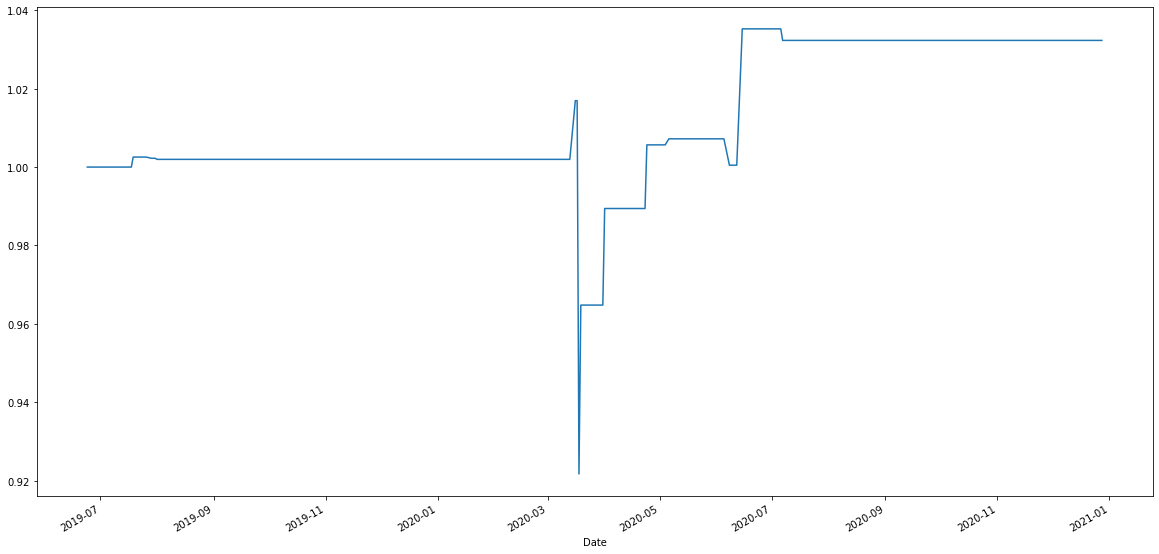

In [24]:
(val_df.log_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

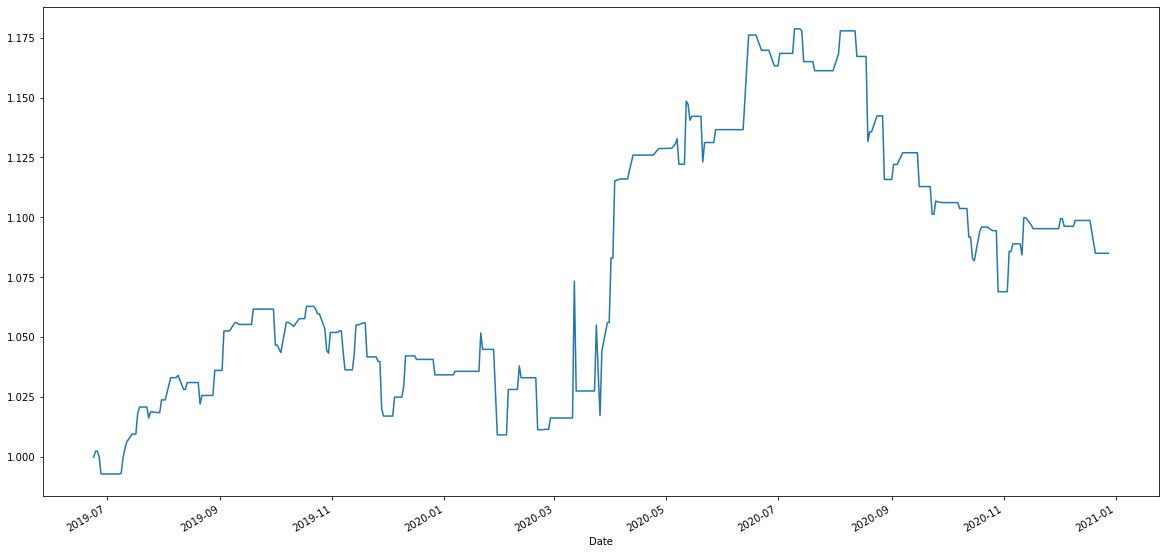

In [25]:
(val_df.rfc_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

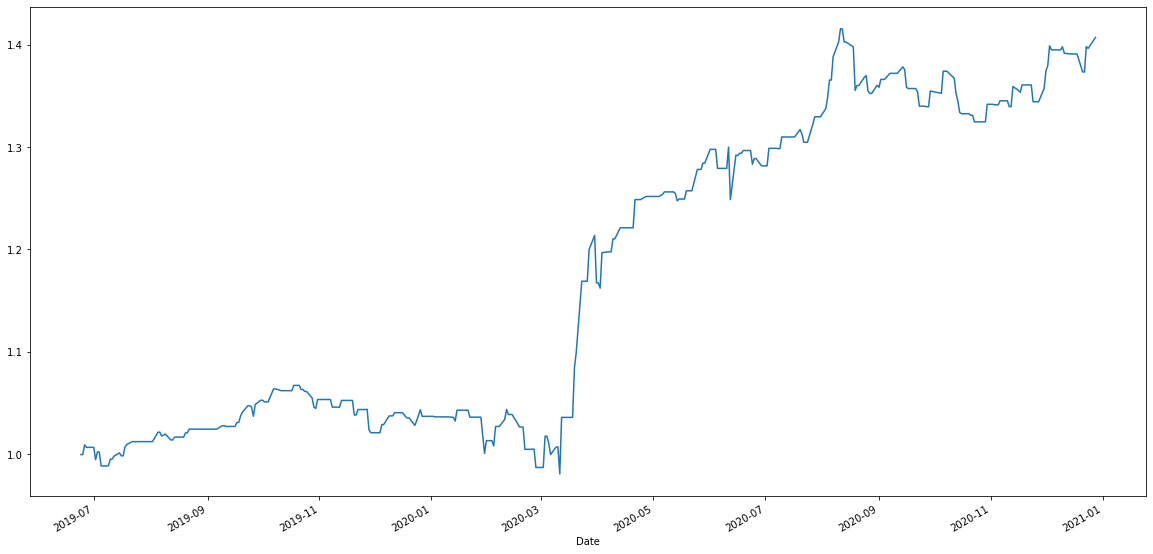

In [26]:
(val_df.tree_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

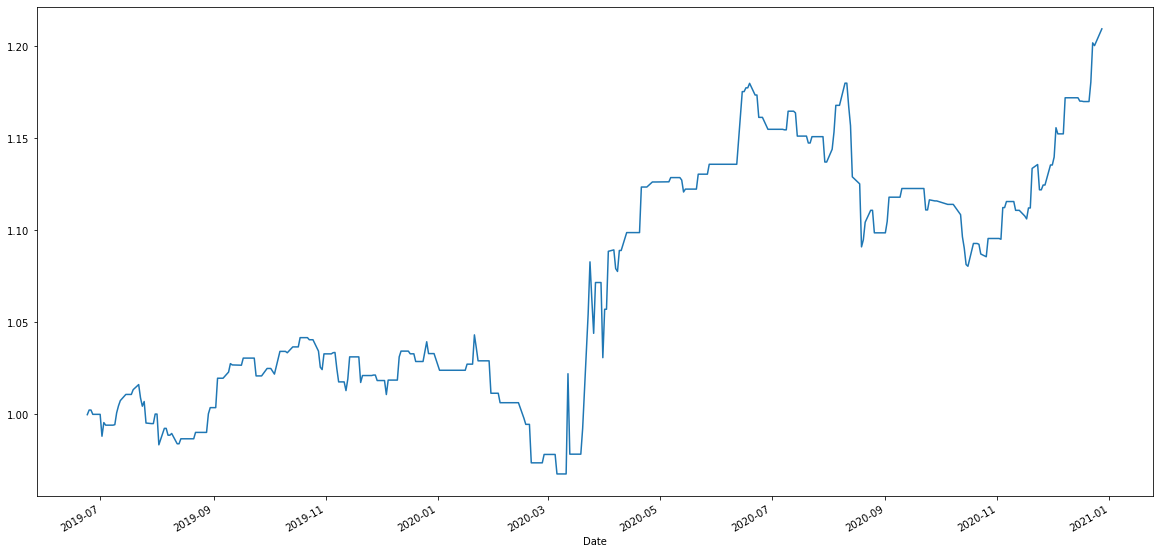

In [27]:
(val_df.lgbm_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

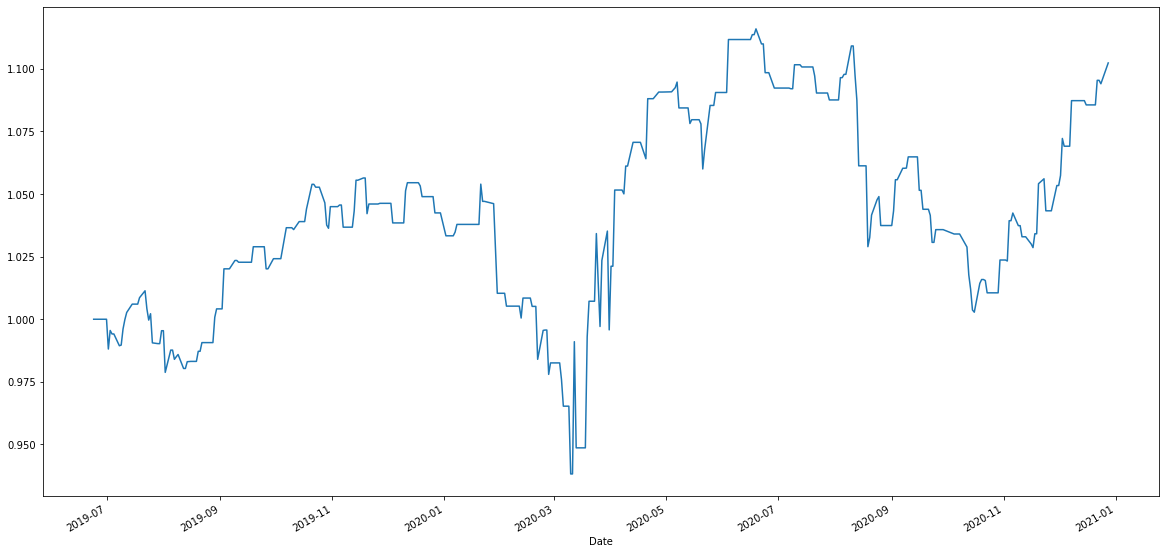

In [28]:
(val_df.XGB_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

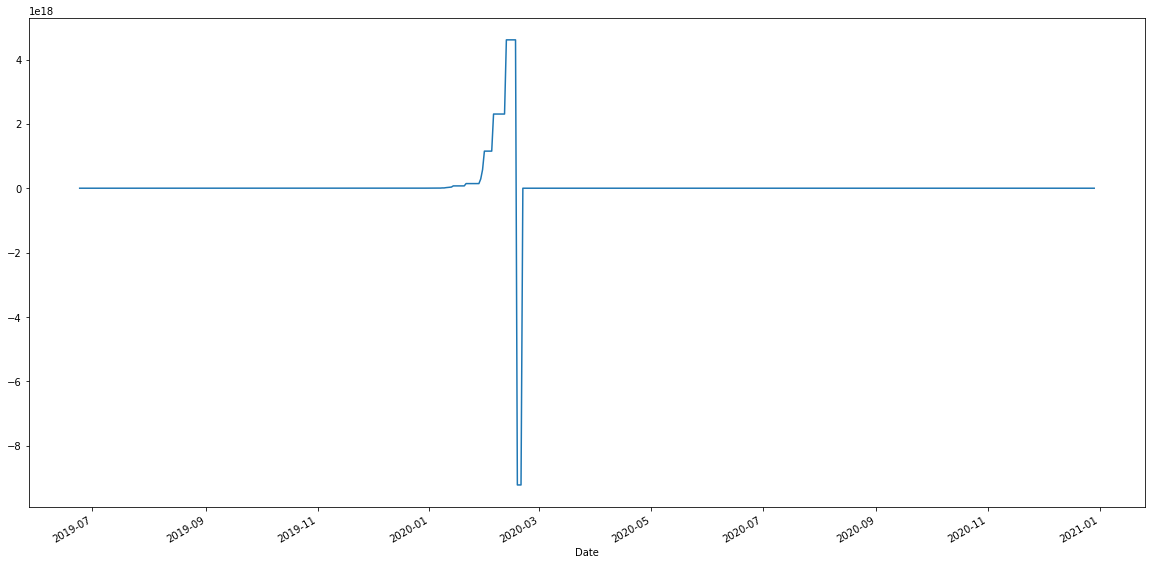

In [29]:
(val_df.grid_xgb_pred + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

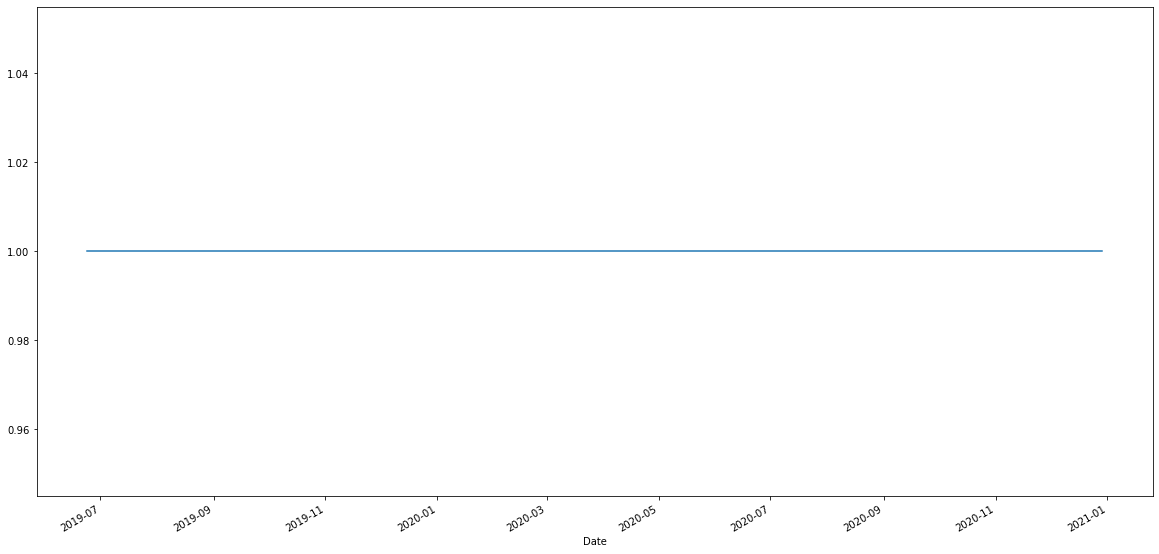

In [30]:
(val_df.grid_lgbm_pred + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

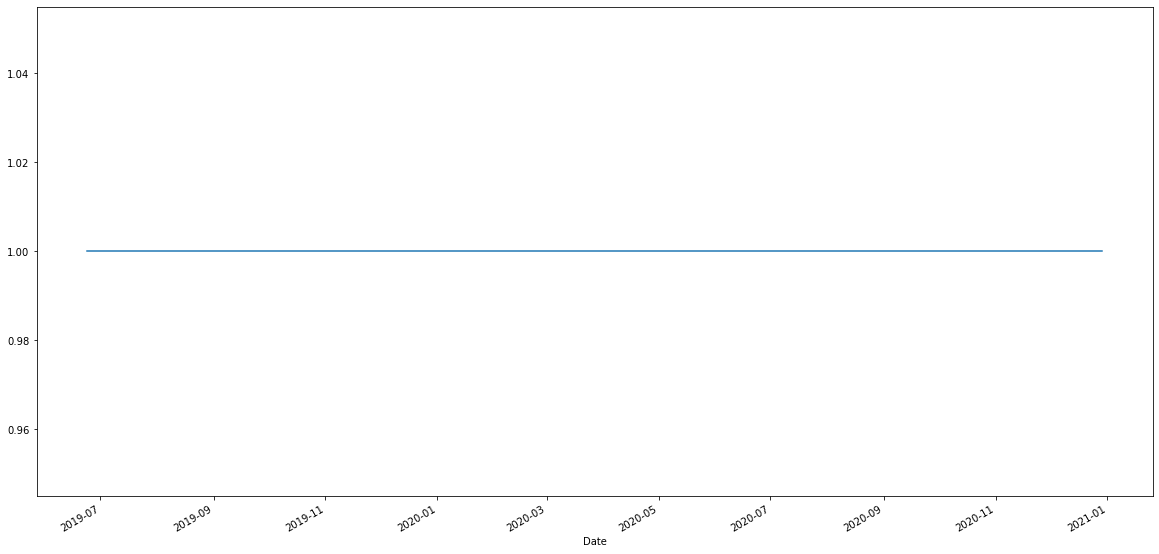

In [31]:
(val_df.grid_lr_pred + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

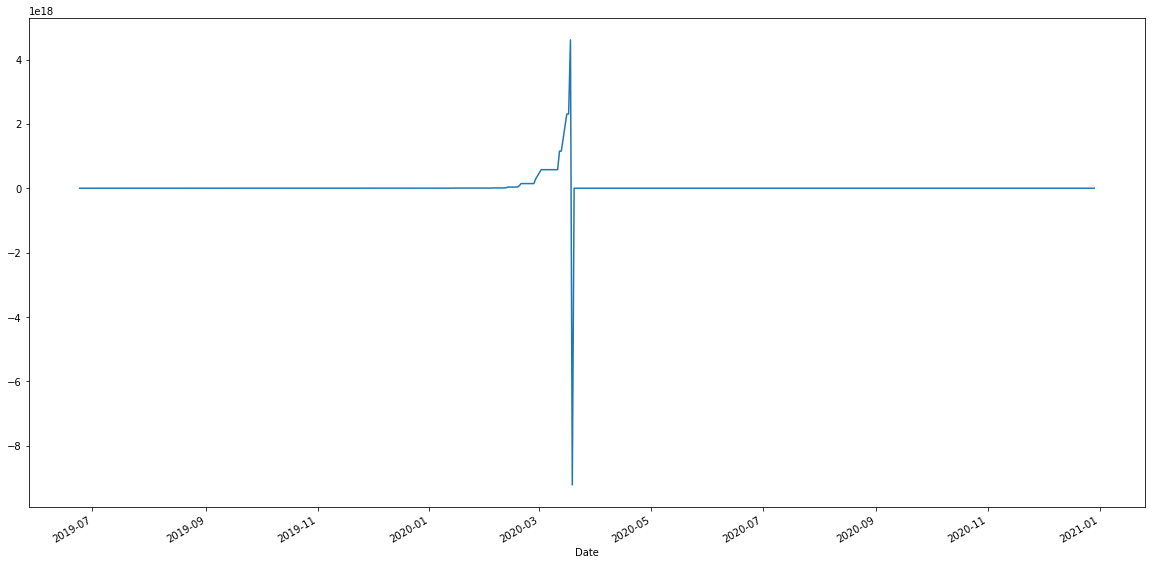

In [32]:
(val_df.grid_rfc_pred + 1).cumprod().plot(figsize=(20,10))

# 샤프지수(Sharpe Ratio)
* 샤프 비율은 투자 자산 또는 매매 전략에서, 일반적으로 위험이라 불리는 편차 한 단위당 초과수익(또는 위험 프리미엄)을 측정한다.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
rtn_df=np.log(val_df[['tree_cum']]+1).fillna(0)
rtn_df

tree_cum
Date                
2019-06-24 -0.000266
2019-06-25  0.000000
2019-06-26  0.009359
2019-06-27 -0.002332
2019-06-28  0.000000
...              ...
2020-12-22  0.000000
2020-12-23  0.017898
2020-12-24 -0.001260
2020-12-28  0.007572
2020-12-29  0.000000

[377 rows x 1 columns]

In [35]:
# 연간수익률

rtn_df.mean() * 252

tree_cum    0.228174
dtype: float64

In [36]:
# 연간 변동성

rtn_df.std() * np.sqrt(252) 

tree_cum    0.137801
dtype: float64

In [37]:
# 연간 복리수익률

cum_rtn_df = np.exp(rtn_df.cumsum())    # cumsum() : cumulative sum
cum_rtn_df.head()

tree_cum
Date                
2019-06-24  0.999734
2019-06-25  0.999734
2019-06-26  1.009134
2019-06-27  1.006784
2019-06-28  1.006784

In [38]:
cum_rtn_df.iloc[0]
cum_rtn_df.iloc[-1]

tree_cum    1.406853
Name: 2020-12-29 00:00:00, dtype: float64

## 연간 누적 수익률 : 25%

In [39]:
# n days 누적수익률을 연간 수익률로 환산

def get_CAGR_series(cum_rtn_df, num_day_in_year=250):  
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

In [40]:
get_CAGR_series(cum_rtn_df)

tree_cum    0.254031
Name: 2020-12-29 00:00:00, dtype: float64

## 샤프지수(Sharpe Ratio) : 1.47로 kodex200(0.87)보다 높음
* sharpe ratio는 높을수록 좋음

In [41]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
    return excess_rtns / (log_rtn_df.std() * np.sqrt(252))

In [42]:
get_sharpe_ratio(rtn_df)

tree_cum    1.474402
dtype: float64

# mdd(Maximum Drawdown)
* 특정 기간동안 발생한 최대 낙폭을 의미하는 하방 리스크 지표 입니다. MDD가 클수록 투자 리스크가 크기 때문에 유의해야 합니다.
* MDD = (기간 동안의 최저점 - 기간 동안의 최고점) / 기간 동안의 최고점

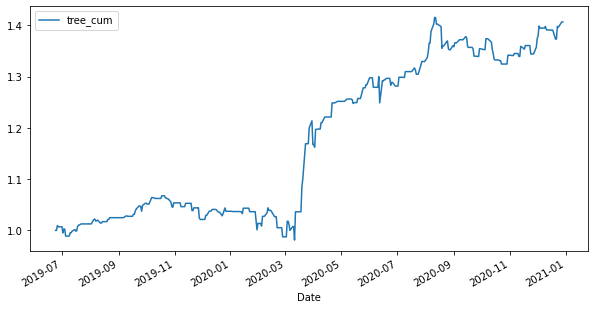

In [43]:
cum_rtn_df.plot(figsize=(10, 5));

<AxesSubplot:xlabel='Date'>

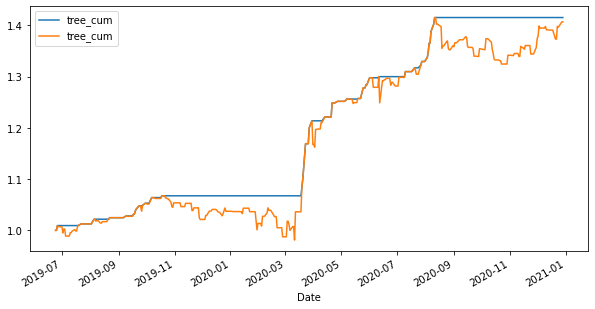

In [44]:
cummax_df = cum_rtn_df.cummax();  # 누적 고점

ax = cummax_df.plot(figsize=(10, 5))
cum_rtn_df.plot(ax=ax)

In [45]:
drawdown_df = cum_rtn_df / cummax_df - 1
drawdown_df[:10]

tree_cum
Date                
2019-06-24  0.000000
2019-06-25  0.000000
2019-06-26  0.000000
2019-06-27 -0.002329
2019-06-28 -0.002329
2019-07-01 -0.002329
2019-07-02 -0.014201
2019-07-03 -0.006798
2019-07-04 -0.006798
2019-07-05 -0.020365

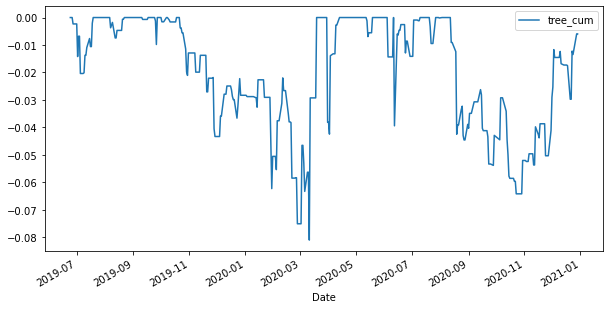

In [46]:
drawdown_df.plot(figsize=(10, 5));

In [47]:
# 최대 손실비율

mdd_series = drawdown_df.min()
mdd_series

tree_cum   -0.080982
dtype: float64

In [48]:
# 최대 손실기간
drawdown_df

tree_cum
Date                
2019-06-24  0.000000
2019-06-25  0.000000
2019-06-26  0.000000
2019-06-27 -0.002329
2019-06-28 -0.002329
...              ...
2020-12-22 -0.029734
2020-12-23 -0.012212
2020-12-24 -0.013456
2020-12-28 -0.005957
2020-12-29 -0.005957

[377 rows x 1 columns]

In [49]:
# dataframe형식으로 boolean index를 넣으면 True 해당 데이터 => 0, False 해당 데이터=> nan
# draw down이 0이면 0, draw down이 0이 아니면 nan

max_point_df = drawdown_df[drawdown_df == 0]
max_point_df.head()

tree_cum
Date                
2019-06-24       0.0
2019-06-25       0.0
2019-06-26       0.0
2019-06-27       NaN
2019-06-28       NaN

In [50]:
_df = max_point_df["tree_cum"]
_df.tail()

Date
2020-12-22   NaN
2020-12-23   NaN
2020-12-24   NaN
2020-12-28   NaN
2020-12-29   NaN
Name: tree_cum, dtype: float64

In [51]:
_df.last_valid_index()  # last_valid_index() : nan이 아닌 마지막 데이터의 인덱스

Timestamp('2020-08-12 00:00:00')

In [52]:
_df.loc[drawdown_df["tree_cum"].last_valid_index()] = 0   # 마지막 데이터 (가장 최근데이)의 값을 0으로

In [53]:
# draw down이 0아닌 데이터를 삭제 draw down == 0 : 전고점 대비 하락하지 않은 날짜
# draw down이 0보다 작은 데이터를 모두 삭제하고 draw down이 0인 데이터만 남긴다

_df = _df.dropna()  
_df.tail()

Date
2020-08-07    0.0
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-12-29    0.0
Name: tree_cum, dtype: float64

In [54]:
# draw down의 기간 길이를 계산
# 얼마 동안 하락하다가 다시 전고점 대비 상승전환하였는지..
# _df.index[1:] : 다음날의 날짜 인덱스
# _df.index[:-1] : 당일의 날짜 인덱스, 길이를 맞추기 위해서 마지막 데이터를 버림

periods = _df.index[1:]-_df.index[:-1]
periods

TimedeltaIndex([  '1 days',   '1 days',  '23 days',   '3 days',   '1 days',
                  '1 days',   '1 days',   '1 days',   '3 days',   '1 days',
                ...
                  '1 days',   '4 days',   '1 days',   '1 days',   '1 days',
                  '1 days',   '3 days',   '1 days',   '1 days', '139 days'],
               dtype='timedelta64[ns]', name='Date', length=102, freq=None)

In [55]:
# draw down이 가장 긴 기간의 순서 인덱스

max_idx = periods.argmax()
max_idx

42

In [56]:
# draw down이 가장 긴 기간

longest_days = periods.max().days
longest_days

150

In [57]:
longest_start_date = _df.index[:-1][max_idx].date()
longest_end_date = _df.index[1:][max_idx].date()

print(longest_start_date, longest_end_date)

2019-10-21 2020-03-19


In [58]:
def get_drawdown_infos(cum_returns_df): 

    cummax_df = cum_returns_df.cummax()   # 누적 전고점
    dd_df = cum_returns_df / cummax_df - 1    # 전고점 대비 하락률 - draw down
 

    mdd_series = dd_df.min()  # max draw down - 전고점 대비 가장 큰 낙폭비율


    dd_duration_info_list = list()
    max_point_df = dd_df[dd_df == 0]  # draw down이 0인 데이터만 0, 나머지는 nan값
    for col in max_point_df:
        _df = max_point_df[col]
        _df.loc[dd_df[col].last_valid_index()] = 0   # 마지막 인덱스 데이터값은 0
        
        #  draw down이 0이 아닌 데이터는 모두 삭제, draw down이 0인 데이터만 남김
        # 전고점보다 가격이 상승하는 데이터만 남김..
        _df = _df.dropna()   
        
        periods = _df.index[1:] - _df.index[:-1]  # 구간별 하락 기간의 날짜수를 계산

        days = periods.days
        max_idx = days.argmax()  # 하락이 가장 긴 기간 데이터의 인덱스

        longest_dd_period = days.max()  # 하락이 가장 긴 기간
        dd_mean = int(np.mean(days))  # 평균 하락 기간
        dd_std = int(np.std(days))    # 하락 기간의 변동성(표준편차)
        

        dd_duration_info_list.append(  # 칼럼별(종목별)로 값을 계산해서 리스트에 담는다
            [
                dd_mean,  # 평균 하락기간
                dd_std,   # 하락기간 표준편차
                longest_dd_period,  # 가장 긴 하락 기간
                
                # 가장 긴 하락기간의 시작일과 종료일
                "{} ~ {}".format(_df.index[:-1][max_idx].date(), _df.index[1:][max_idx].date())
            ]
        )

    dd_duration_info_df = pd.DataFrame(
        dd_duration_info_list,
        index=dd_df.columns,
        columns=['drawdown mean', 'drawdown std', 'longest days', 'longest period']
    )
    return dd_df, mdd_series, dd_duration_info_df

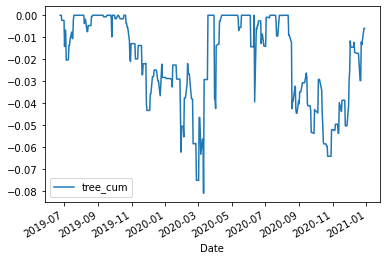

In [59]:
result = get_drawdown_infos(cum_rtn_df)
result[0].plot();

## mdd값 : -0.08
* kodex200의 베이스 모델보다 mdd(-0.34) 절대값이 작다. 
* mdd는 절대값이 작을 수록 좋음

In [60]:
result[1]

tree_cum   -0.080982
dtype: float64

In [61]:
result[2]

drawdown mean  drawdown std  longest days           longest period
tree_cum              5            20           150  2019-10-21 ~ 2020-03-19